# Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install -Uq pyenchant underthesea pyvi wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00


In [8]:
!apt-get update
!apt-get install -y libenchant-2-dev

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [79.8 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,798 kB]
Get:13 http://archive.ubuntu.com/ubuntu jamm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import underthesea
import unicodedata
import enchant
import sys
sys.path.append('/content/drive/MyDrive/DA/')
import process # Một module tự tạo dùng để xử lý văn bản

from underthesea import word_tokenize
from pyvi import ViTokenizer
from wordcloud import WordCloud

# **1. PRE-PROCESSING**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DA/shopee_comments.csv')
df.head()

,productid,category,username,rating,comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510857 entries, 0 to 510856
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   productid  510857 non-null  int64 
 1   category   510857 non-null  object
 2   username   502008 non-null  object
 3   rating     510857 non-null  int64 
 4   comment    351082 non-null  object
dtypes: int64(2), object(3)
memory usage: 19.5+ MB


In [ ]:
# Số quan sát và số thuộc tính của bộ dữ liệu trước khi xử lý
df.shape

(510857, 5)

In [ ]:
# Kiểm tra dữ liệu rỗng
df.isnull().sum()

,0
productid,0
category,0
username,8849
rating,0
comment,159775


In [ ]:
# Xử lý dữ liệu rỗng ở cột comment
df = df.dropna(subset=['comment'])
df.shape

(351082, 5)

In [ ]:
# Kiểm tra dữ liệu trùng ở cột processed_comment
df.duplicated(subset=['comment']).sum()

41568

In [ ]:
# Xóa các dữ liệu trùng
df = df.drop_duplicates(subset=['comment'])
df.shape

(309514, 5)

# Cleaning Text

In [ ]:
df['processed_comment'] = df['comment'].astype(str).apply(lambda cmt: process.normalizeComment(cmt))
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đúng với mô tả:có\r\nmàu sắc:đen\r\nc...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm qua hnay đã có hàng. đồng hồ...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,màu sắc:đen\r\nđúng với mô tả:đúng\r\...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,đúng với mô tả:yes\r\nchất liệu:nhự...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",màu sắc:đen trắng\r\n\r\nđồng hồ đẹp...


In [ ]:
# Kiếm tra bình luận có chứa link URL hay không
df['contain_url'] = df['processed_comment'].apply(lambda cmt: process.containsURL(cmt))
df[df['contain_url'] == 1].head()

,productid,category,username,rating,comment,processed_comment,contain_url
348,2685079332,Đồng Hồ,bt8ig7roqs,5,Đồng hồ xinh nhen\r\nMà hông có chống xước:(\r...,đồng hồ xinh nhen\r\nmà hông có chống...,1
360,2685079332,Đồng Hồ,thaoooo08193,5,"(QC)Lương chưa về, tiền về tay ngay khi đăng k...","(qc)lương chưa về, tiền về tay ngay k...",1
1224,22147849677,Đồng Hồ,v*****2,5,[TB] ĐÓN NĂM MỚI - KHUYẾN MẠI MỚI!\r\nTặng 20%...,[tb] đón năm mới - khuyến mại mới!\r\...,1
1278,22147849677,Đồng Hồ,htngocluan,5,Đẹp lắm mn ơiiii k bt có bền k nma nhận hàng ư...,đẹp lắm mn ơiiii k bt có bền k nma nhạ...,1
1279,22147849677,Đồng Hồ,v*****2,5,[TB] VIETTEL TẶNG 20% GIÁ TRỊ TẤT CẢ THẺ NẠP ...,[tb] viettel tặng 20% giá trị tất cả th...,1


In [ ]:
# Giữ lại các bình luận không chứa link URL
df = df[df['contain_url'] == 0]
df = df.drop(columns=['contain_url']).reset_index(drop=True) # xóa cột 'contain_url'
df.shape

(307955, 6)

In [ ]:
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.removeSpecialLetters(cmt))
df[df['username'] == 'tranhuuthanh1996']

,productid,category,username,rating,comment,processed_comment
344,2685079332,Đồng Hồ,tranhuuthanh1996,5,Hàng đẹp . Giao nhanh . Đáng mua 👍👍👍👍👍👍👍👍👍👍👍👍👍...,hàng đẹp giao nhanh đáng mua


In [ ]:
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.removeDuplicateLetters(cmt))
df[df['username'] == 'anhhthiiii']

,productid,category,username,rating,comment,processed_comment
402,2685079332,Đồng Hồ,anhhthiiii,5,Đẹpppppp\r\n\r\nCó nhiều loại cracker như Scri...,đẹp có nhiều loại cracker như script kid...


In [ ]:
# Xây dựng dictionary cho các từ viết tắt
file = open('/content/drive/MyDrive/DA/data_files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()

# test
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.normalizeComment(cmt)) # chuẩn hóa unicode lần nữa
teen_dict['cx']

'cũng'

In [ ]:
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.replaceTeencode(cmt, teen_dict))
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đúng với mô tả có màu sắc đen chất ...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm qua hôm nay đã có hàng đồng ho...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,màu sắc đen đúng với mô tả đúng chấ...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,đúng với mô tả yes chất liệu nhựa m...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",màu sắc đen trắng đồng hồ đẹp đóng ...


In [ ]:
# Xây dựng dictionary cho các từ đơn tiếng Việt hợp lệ
file = open('/content/drive/MyDrive/DA/data_files/vocabulary.txt', 'r', encoding="utf8")
vocab_lst = file.read().split('\n')
vocab_dict = {}
for line in vocab_lst:
    key = unicodedata.normalize('NFD', line.strip())
    vocab_dict[key] = True
file.close()

english_vocab = enchant.Dict('en_US') # từ điển tiếng Anh

In [ ]:
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.removeNoiseWord(cmt, vocab_dict, english_vocab))
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đúng với mô tả có màu sắc đen chất ...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm qua nay đã có hàng đồng hồ s...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,màu sắc đen đúng với mô tả đúng chấ...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,đúng với mô tả yes chất liệu nhựa m...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",màu sắc đen trắng đồng hồ đẹp đóng ...


In [ ]:
# Xóa các từ khóa không cần thiết trong các bình luận
noneed_phrases = ["màu sắc","đúng với mô tả","chất liệu","hình ảnh","video","mang tính chất","nhận xu","minh họa"]
for phrase in noneed_phrases:
    phrase = unicodedata.normalize('NFD', phrase.strip())
    df['processed_comment'] = df['processed_comment'].apply (lambda cmt: cmt.replace(phrase,""))

df[df['username'] == 'thngchunguyn']

,productid,category,username,rating,comment,processed_comment
60374,25400592258,Giày Dép Nữ,thngchunguyn,5,Đúng với mô tả:đúng nhaaa\r\nMàu sắc:màu hồng ...,đúng nha màu hồng pastel không có bie...
61099,25400592258,Giày Dép Nữ,thngchunguyn,5,Chất liệu:không có biết nữa\r\nĐúng với mô tả:...,không có biết nữa xinh xĩu màu hồ...


In [ ]:
# Sau đó xóa các khoảng trắng thừa
df['processed_comment'] = df['processed_comment'].apply (lambda cmt: process.removeSpace(cmt))

In [ ]:
# Xây dựng list các từ dừng phổ biến ở VN
stopwords_lst = []
with open('/content/drive/MyDrive/DA/data_files/stopwords.txt', 'r', encoding="utf8") as lines:
    for line in lines:
        line = unicodedata.normalize('NFD', line.strip())
        stopwords_lst.append(line)

#test
print(stopwords_lst[5])

bị


In [ ]:
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: process.removeStopwords(cmt, stopwords_lst))
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đen cao su hàng được đóng gói chắc cha...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm qua nay hàng đồng hồ siêu đẹ...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,đen đúng nhựa độ chống nước độ bê...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,yes nhựa đen đồng hồ đẹo đúng như mô...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",đen trắng đồng hồ đẹp đóng gói đẹp s...


In [ ]:
df = df.reset_index(drop = True)
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đen cao su hàng được đóng gói chắc cha...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm qua nay hàng đồng hồ siêu đẹ...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,đen đúng nhựa độ chống nước độ bê...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,yes nhựa đen đồng hồ đẹo đúng như mô...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",đen trắng đồng hồ đẹp đóng gói đẹp s...


In [ ]:
# Tách từ
df['processed_comment'] = df['processed_comment'].apply(lambda cmt: ViTokenizer.tokenize(cmt))
df.head()

,productid,category,username,rating,comment,processed_comment
0,2685079332,Đồng Hồ,minhquan210598,5,Đúng với mô tả:Có\r\nMàu sắc:Đen\r\nChất liệu:...,đen cao_su hàng được đóng_gói chắc_chắn đưa th...
1,2685079332,Đồng Hồ,cobegachmen274,5,Đặt hôm qua hnay đã có hàng. Đồng hồ siêu đẹp ...,đặt hôm_qua nay hàng đồng_hồ siêu đẹp chất_lượ...
2,2685079332,Đồng Hồ,vanthihanhnguyen,5,Màu sắc:đen\r\nĐúng với mô tả:đúng\r\nChất liệ...,đen đúng nhựa độ chống nước độ bền máy_móc cùn...
3,2685079332,Đồng Hồ,jaketr2k,5,Đúng với mô tả:Yes\r\nChất liệu:nhựa\r\nMàu sắ...,yes nhựa đen đồng_hồ đẹo đúng như mô_tả giao h...
4,2685079332,Đồng Hồ,thaiphongnguyen_21,5,"Màu sắc:Đen trắng\r\n\r\nĐồng hồ đẹp, đóng gói...",đen trắng đồng_hồ đẹp đóng_gói đẹp shop tặng k...


In [ ]:
# Xem 50 dòng bất kỳ của cột processed_comment
for index, row in df.sample(50).iterrows():
    print(row['processed_comment'])

túi túi mùi rất hôi
giá bán_lẻ hàng dịch_vụ nghĩa hy viên ỷ lan bạn hy viên học_tập
kẹp dễ_thương mua đú trend kẹp to bằng nhựa rẻ đẹp quay hết bài
giao hàng nhanh đầy_đủ kẹp cute mang quài
đồ đẹp chất vải mát giao hàng nhanh đáng mua
dép nhỏ đeo hơi chật nhưng được dép rất êm nói_chung ok
đúng vàng xanh nhựa kẹp tóc đẹp giống hình
nhỏ size mua đôi đơn khác màu trắng to hơn màu đen đều size
đen đúng vải nhận hàng đẹp lắm
giao hàng đẹp chất_lượng ủng_hộ tiếp vừa_vặn tay
đẹp tội hơi ngắn cao m nên mặc gần vừa nặng ok sốp giao hàng nhanh ok
lam moi giao hang nhanh nua lan se quay lai
đánh_giá đen đế màu trắng giá mềm nhìn rất ok
sản_phẩm nên tham_khảo dùng thử trải nghiệm giao hàng nhanh nhiệt_tình lắm cân_nhắc quay
hồng lông vải xinh lắm nhìn hơi ô dề tí nhưng kỉu xinh
giao hàng nhanh chất lg ổn ủng_hộ
ảnh mang tính lấy xu thoi nhưng áo đẹp m n săn sale lên thấy rất ổn
màu nâu hơi xấu một_tí đúng sương sương vải sản_phẩm hong ưng lắm màu nâu hơi xấu hơn hình
hàng ok lắm rất ưng mua hàng 

In [ ]:
df = df.dropna(subset=['processed_comment']) #Xóa các bình luận rỗng và trùng lặp còn lại sau khi làm sạch rồi lưu vào file
df = df.drop_duplicates(subset=['processed_comment'])
df.to_csv('/content/drive/MyDrive/DA/data_files/clean_comments.csv',index=False)

# **2. EDA**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DA/data_files/clean_comments.csv', encoding='utf-8')

In [ ]:
df1 = df1[['category','rating','processed_comment']]

In [ ]:
df1['rating'].describe()

,rating
count,294831.000000
mean,4.709322
std,0.831998
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
rating_counts = df1['rating'].value_counts()
rating_counts

,count
rating,
5,252266
4,19943
3,10107
1,7999
2,4516


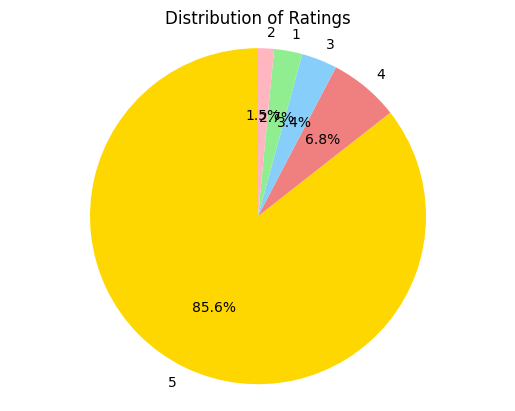

In [ ]:
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
df1['category'].value_counts()

,count
category,
Thời Trang Nam,68628
Túi Ví Nữ,54897
Giày Dép Nữ,45160
Phụ Kiện & Trang Sức Nữ,39724
Thời Trang Nữ,36974
Giày Dép Nam,26721
Đồng Hồ,22727


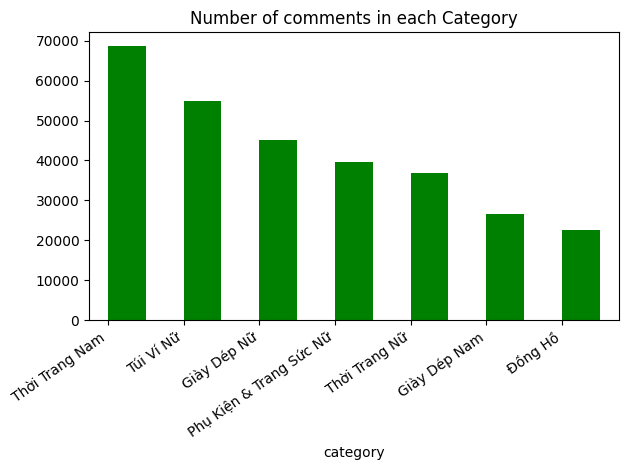

In [ ]:
df1['category'].value_counts().plot(kind='bar', legend=False, align='edge',color='green')

plt.title('Number of comments in each Category')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
grouped = df1.groupby('category').agg({'rating': 'mean'})
grouped

,rating
category,
Giày Dép Nam,4.619438
Giày Dép Nữ,4.667538
Phụ Kiện & Trang Sức Nữ,4.683793
Thời Trang Nam,4.712799
Thời Trang Nữ,4.737789
Túi Ví Nữ,4.813633
Đồng Hồ,4.633872


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Đồng Hồ'),
  Text(0.0, 0, 'Giày Dép Nam'),
  Text(1.0, 0, 'Giày Dép Nữ'),
  Text(2.0, 0, 'Phụ Kiện & Trang Sức Nữ'),
  Text(3.0, 0, 'Thời Trang Nam'),
  Text(4.0, 0, 'Thời Trang Nữ'),
  Text(5.0, 0, 'Túi Ví Nữ'),
  Text(6.0, 0, 'Đồng Hồ'),
  Text(7.0, 0, '')])

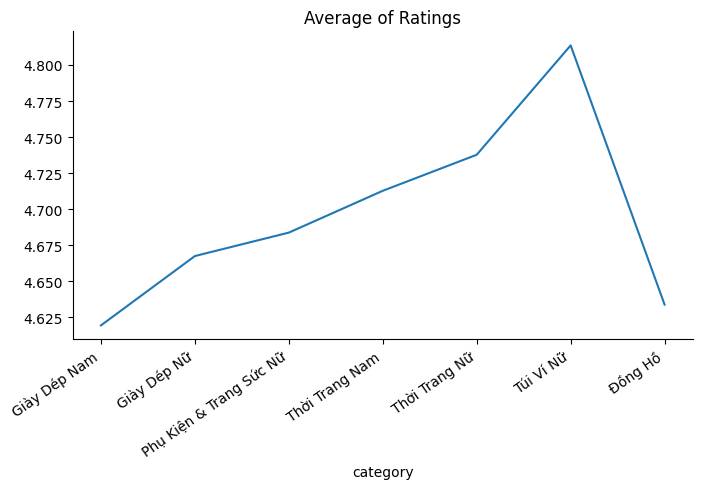

In [ ]:
grouped['rating'].plot(kind='line', figsize=(8, 4), title='Average of Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=35, ha='right')

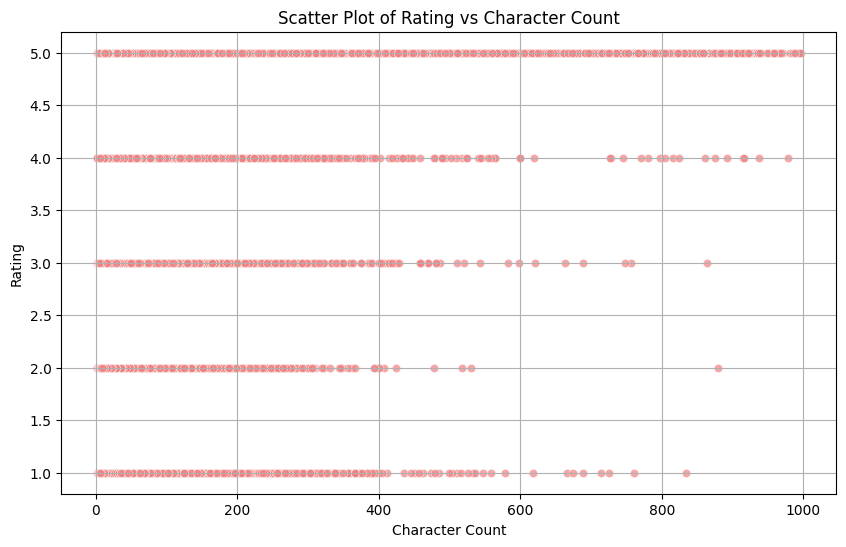

In [ ]:
# Biểu diễn số ký tự của các bình luận theo rating

# Đếm số ký tự của từng comment
df1['length'] = df1['processed_comment'].astype(str).apply(len)
# Giới hạn số ký từ từ 0 đến 1000
filtered_comments = df1[(df1['length'] >= 0) & (df1['length'] <= 1000)]
# Tạo một DataFrame chứa rating và độ dài của comment
data = pd.DataFrame({'rating': df1['rating'], 'length': filtered_comments['length']})

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length', y='rating', data=data, color='lightcoral', alpha=0.7)
plt.title('Scatter Plot of Rating vs Character Count')
plt.xlabel('Character Count')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Labeling Data

In [ ]:
conditions = [
    (df1['rating'] <= 3),
    (df1['rating'] > 3)
]

values = ['neg','pos']

df1['class'] = np.select(conditions, values)
df2 = df1[['category','processed_comment','class']]

df2.reset_index(drop=True, inplace=True)
df2.head()

,category,processed_comment,class
0,Đồng Hồ,đen cao_su hàng được đóng_gói chắc_chắn đưa th...,pos
1,Đồng Hồ,đặt hôm_qua nay hàng đồng_hồ siêu đẹp chất_lượ...,pos
2,Đồng Hồ,đen đúng nhựa độ chống nước độ bền máy_móc cùn...,pos
3,Đồng Hồ,yes nhựa đen đồng_hồ đẹo đúng như mô_tả giao h...,pos
4,Đồng Hồ,đen trắng đồng_hồ đẹp đóng_gói đẹp shop tặng k...,pos


<Figure size 1000x700 with 0 Axes>

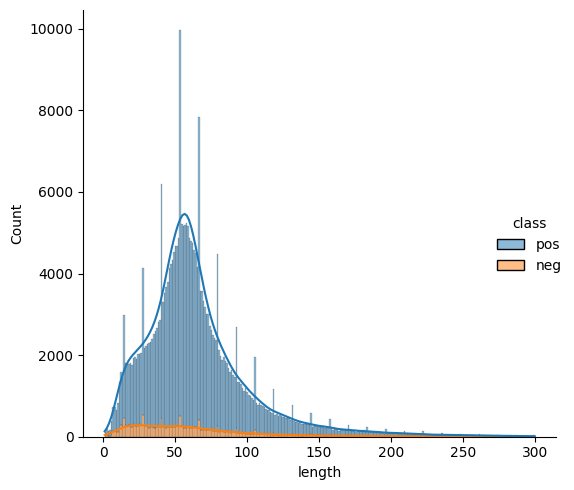

In [ ]:
df1['length'] = df1['processed_comment'].astype(str).apply(len)
filtered_comments = df1[(df1['length'] >= 0) & (df1['length'] <= 300)]
data = pd.DataFrame({'class': df1['class'], 'length': filtered_comments['length']})

plt.figure(figsize=(10, 7))
sns.displot(data=data, x='length', hue='class', multiple='stack', kde=True)
plt.tight_layout()
plt.show()

In [ ]:
df2 = df1[['category','processed_comment','class']]

In [ ]:
grouped = df2.groupby(['category', 'class'])['processed_comment'].count().unstack()
grouped

class,neg,pos
category,,
Giày Dép Nam,2648,24073
Giày Dép Nữ,4189,40971
Phụ Kiện & Trang Sức Nữ,3241,36483
Thời Trang Nam,5273,63355
Thời Trang Nữ,2743,34231
Túi Ví Nữ,2375,52522
Đồng Hồ,2153,20574


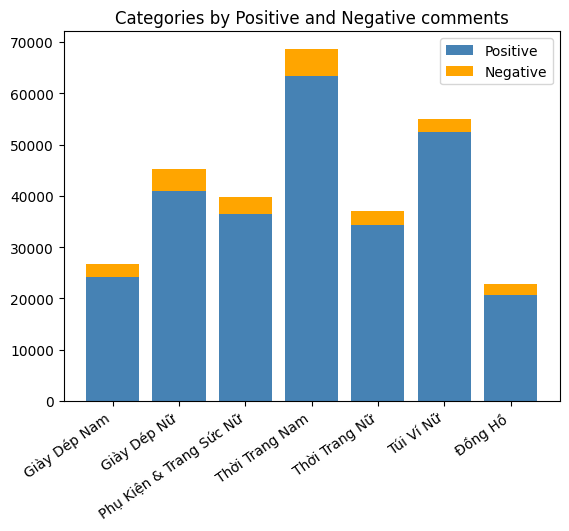

In [ ]:
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped['pos'], label='Positive',color='steelblue')
ax.bar(grouped.index, grouped['neg'], bottom=grouped['pos'], label='Negative',color='orange')
ax.set_title('Categories by Positive and Negative comments')
plt.xticks(rotation=35, ha='right')
ax.legend()

In [ ]:
df_final = df2[['processed_comment','class']]
df_final.to_csv('/content/drive/MyDrive/DA/data_files/shopee_final.csv',index=False)

# **Visualize**

In [ ]:
df_pos = df1[df1['rating'] > 3]
df_pos.head()

,category,rating,processed_comment,length,class
0,Đồng Hồ,5,đen cao_su hàng được đóng_gói chắc_chắn đưa th...,73,pos
1,Đồng Hồ,5,đặt hôm_qua nay hàng đồng_hồ siêu đẹp chất_lượ...,140,pos
2,Đồng Hồ,5,đen đúng nhựa độ chống nước độ bền máy_móc cùn...,495,pos
3,Đồng Hồ,5,yes nhựa đen đồng_hồ đẹo đúng như mô_tả giao h...,119,pos
4,Đồng Hồ,5,đen trắng đồng_hồ đẹp đóng_gói đẹp shop tặng k...,76,pos


<Axes: ylabel='category'>

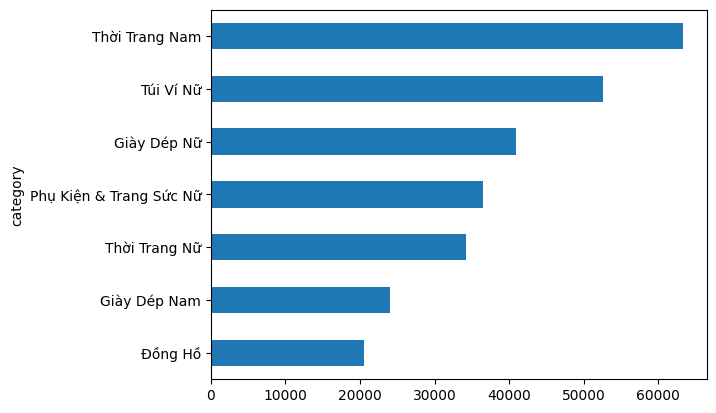

In [ ]:
df_pos.category.value_counts().sort_values().plot(kind = 'barh')

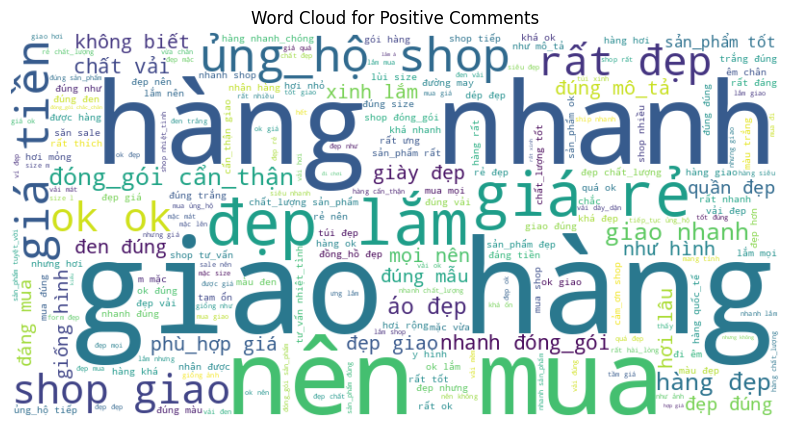

In [ ]:
# Wordcloud

# Kết hợp nội dung của tất cả các comments thành 1 list
all_comments = ' '.join(df_pos['processed_comment'].astype(str).tolist())

wc_pos = WordCloud(width=800, height=400, background_color='white')
# generate the word cloud
wc_pos.generate(all_comments)
#Show
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation='bilinear',)
plt.axis('off')
plt.title('Word Cloud for Positive Comments')
plt.show()

In [ ]:
df_neg = df1[df1['rating'] < 4]
df_neg.head()

,category,rating,processed_comment,length,class
202,Đồng Hồ,1,bóc seal xước tùm_lum shop chịu trách_nhiệm va...,50,neg
422,Đồng Hồ,1,giao đồng_hồ chạy sai thời_gian,31,neg
463,Đồng Hồ,2,mặt đồng_hồ rất dễ xước mua đeo cẩn_thận tí xư...,68,neg
552,Đồng Hồ,1,đẹp đúng mô_tả da đẹp nhưng kim giây kẹt kim p...,66,neg
666,Đồng Hồ,3,da đen hàng đẹp nhưng khá bất_ngờ cách đóng_gó...,156,neg


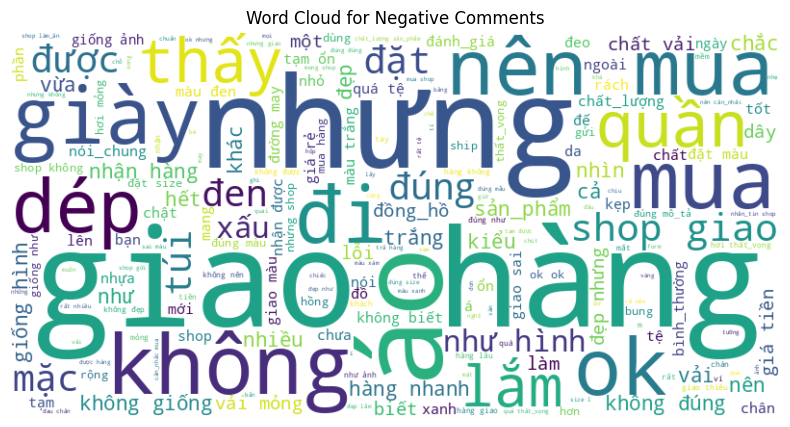

In [ ]:
# Wordcloud

# Kết hợp nội dung của tất cả các comments thành 1 list
all_comments = ' '.join(df_neg['processed_comment'].tolist())

# Tạo wordcloud
wc_neg = WordCloud(width=800, height=400, background_color='white')
# generate the word cloud
wc_neg.generate(all_comments)

# Show
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Comments')
plt.show()